In [1]:
import numpy as np
from numpy.random import *
import math
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

以下、numpy.randomは省略

### 一様分布から乱数の生成方法


**rand() : 0~1のランダムな数値を返す。引数には、返ってくる値(配列)の次元を指定する。**

In [2]:
print("--- rand() --- \n", rand())
print("--- rand(2, 3) --- \n", rand(2, 3))

--- rand() --- 
 0.25904096275196276
--- rand(2, 3) --- 
 [[0.48384831 0.34450476 0.24644232]
 [0.47238849 0.41157956 0.00676551]]


**範囲を変えたいときは、ベクトル演算を行う。**

In [3]:
print("10~50のランダムな値 : ", rand()*40 + 10)

10~50のランダムな値 :  34.13145300880225


**もしくは、uniform()を使う。**

In [4]:
print("10~100のランダムな値を(5,5)の行列で返す :\n", uniform(10, 100, (5,5)))

10~100のランダムな値を(5,5)の行列で返す :
 [[93.3854583  59.03860018 44.41338937 70.60693722 33.03773496]
 [63.72205483 38.22541456 30.32536598 63.61155961 18.16515167]
 [25.8806253  61.49715493 94.93001224 23.49035296 62.6683662 ]
 [44.50905516 42.41191011 29.16077061 41.33777543 22.02957666]
 [78.7718465  44.42598122 97.65393475 99.2674411  65.96511159]]


### 正規分布から乱数の生成方法


**randn() : 平均 0, 標準偏差 1 の正規分布(標準正規分布)からランダムな数値を返す。引数には、返ってくる値(配列)の次元を指定する。**  
  
**standard_normal() : 同上 (サイズの指定方法が異なる)**

In [5]:
print("--- randn() --- \n", randn())
print("--- randn(2, 3) --- \n", randn(2, 3))

print("--- standard_normal() --- \n", standard_normal())
print("--- standard_normal(2, 3) --- \n", standard_normal((2, 3)))

--- randn() --- 
 0.3439204346432888
--- randn(2, 3) --- 
 [[-0.5176735  -0.47432126 -0.006281  ]
 [-0.02710282 -0.07435093  0.26613402]]
--- standard_normal() --- 
 -0.946591321843572
--- standard_normal(2, 3) --- 
 [[-0.16874683 -0.12187682 -0.16582939]
 [-0.73148494  1.12982808  0.48715966]]


**範囲を変えたいときは、ベクトル演算か normal() を使用する。**

In [6]:
gaussian_dist = normal(10, 5, 10000)
print("平均 10, 標準偏差 5 の乱数を10000個返す :\n", gaussian_dist)

平均 10, 標準偏差 5 の乱数を10000個返す :
 [ 9.94480407  2.8090439  16.86053057 ... -0.189829   11.10687973
  2.15997816]


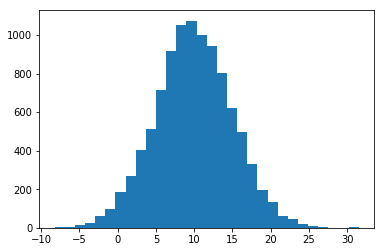

In [7]:
# 実際の分布
plt.hist(gaussian_dist, bins=30)
plt.show()

#### 正規分布のグラフを描写する

方法1 : 自分で正規分布の関数を作り、曲線を引く。  
方法2 : scipy.statsのnorm.pdfを使用す。

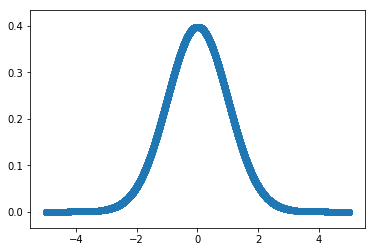

In [8]:
f = lambda x: (math.exp(-x**2/2)) / math.sqrt(2*math.pi)
n = np.linspace(-5.0, 5.0, 10000)
p = []
for i in range(len(n)):
    p.append(f(n[i]))
plt.scatter(n, p)
plt.show()

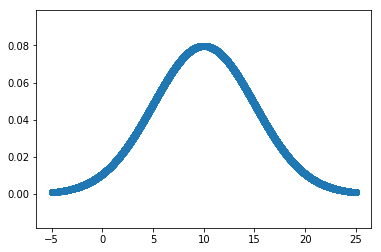

In [9]:
n = np.linspace(-5.0, 25.0, 10000)
p = []
for i in range(len(n)):
    p.append(norm.pdf(x=n[i], loc=10, scale=5))
plt.scatter(n, p)
plt.show()

#### おまけ

**確率を指定し、選ばれる数値の確率に重みをつけることで、ある分布に従った乱数を生成しようとすると、、、**

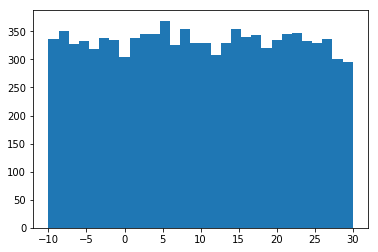

In [10]:
data = np.linspace(-10, 30, 10000)
p = []
for i in range(len(data)):
    p.append(norm.pdf(x=data[i], loc=10, scale=5))

plt.hist(choice(data, 10000, p), bins=30)
plt.show()

In [11]:
np.sum(p)

249.95919271441406

**おそらく、pのトータルが"1"になっていないことが原因**

### shuffle()について

**リストまたはnumpy配列の最初の次元をランダムにシャッフルする。**  
**それ以降の次元については、そのままになる。**　

**返り値はなく、渡された配列そのものを書き換える。**

In [12]:
arr_1_1 = np.array(range(1,10))
print("shuffle() 前 :", arr_1_1)
arr_1_2 = shuffle(arr_1_1)
print("shuffle() 後 arr_1_1:", arr_1_1)
print("shuffle() 後 arr_1_2:", arr_1_2)

shuffle() 前 : [1 2 3 4 5 6 7 8 9]
shuffle() 後 arr_1_1: [4 7 2 3 5 6 9 8 1]
shuffle() 後 arr_1_2: None


In [13]:
arr_2 = np.array(range(1,10)).reshape((3,3))
print("shuffle() 前 :\n", arr_2)
shuffle(arr_2)
print("shuffle() 後 :\n", arr_2)

shuffle() 前 :
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
shuffle() 後 :
 [[4 5 6]
 [1 2 3]
 [7 8 9]]


### permutation()について

**リストまたはnumpy配列の最初の次元をランダムにシャッフルする。**  
**それ以降の次元については、そのままになる。**　

**ここまでは、shuffle() と同じ。**  

**しかし、返り値があり、渡された配列をコピーして返す。つまり、渡された配列は書き換えられない。**  
**また、int型を受け取ることができ、その場合、0からその値-1までの重複なしでランダムな配列が返ってくる。**

In [14]:
arr_1_1 = np.array(range(1,10))
print("permutation() 前 :", arr_1_1)
arr_1_2 = permutation(arr_1_1)
print("permutation() 後 arr_1_1:", arr_1_1)
print("permutation() 後 arr_1_2:", arr_1_2)

permutation() 前 : [1 2 3 4 5 6 7 8 9]
permutation() 後 arr_1_1: [1 2 3 4 5 6 7 8 9]
permutation() 後 arr_1_2: [3 6 7 8 2 4 5 1 9]


In [15]:
arr_2_1 = np.array(range(1,10)).reshape((3,3))
print("permutation() 前 :\n", arr_2_1)
arr_2_2 = permutation(arr_2_1)
print("permutation() 後 :\n", arr_2_2)

permutation() 前 :
 [[1 2 3]
 [4 5 6]
 [7 8 9]]
permutation() 後 :
 [[4 5 6]
 [7 8 9]
 [1 2 3]]


In [16]:
arr_3 = permutation(5) # permutation(arange(5))　と同じ
print(arr_3)

[0 3 2 1 4]
